--- Step 1.5: Running EDA on cleaned_daily_data.csv ---


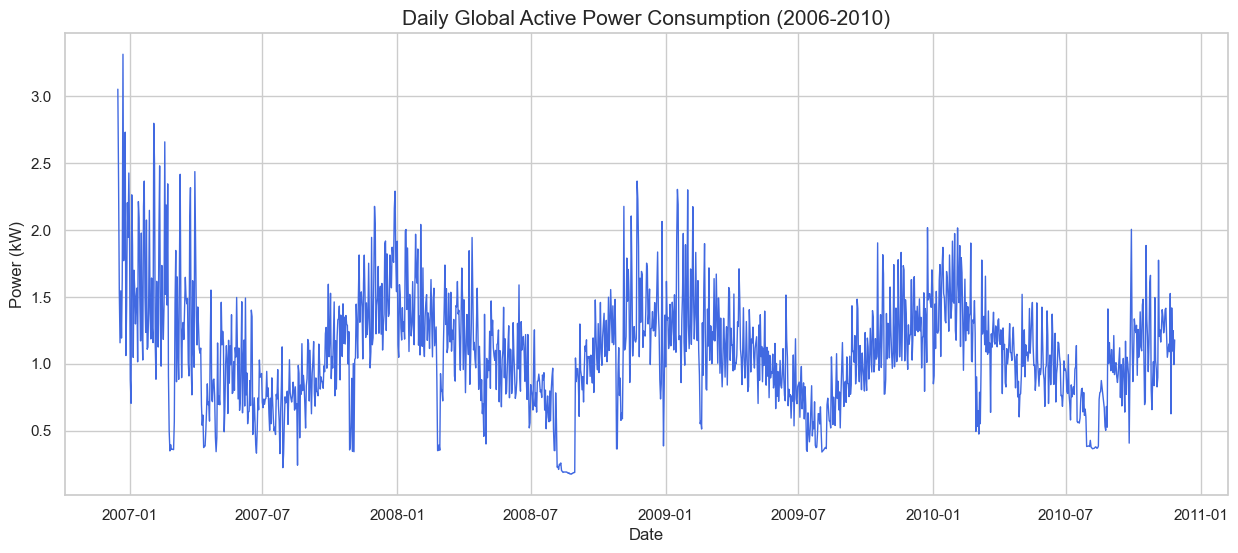

C:\Users\abhij\AppData\Local\Temp\ipykernel_28860\4093442628.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='Global_active_power', data=df, palette='Spectral')


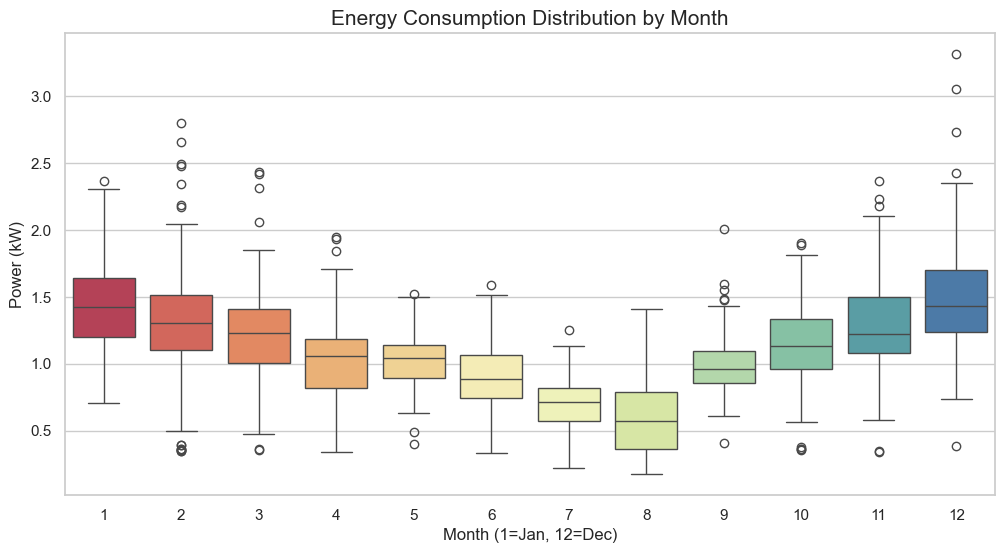

C:\Users\abhij\AppData\Local\Temp\ipykernel_28860\4093442628.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='month', y='Global_active_power', data=df, inner="quartile", palette='viridis')


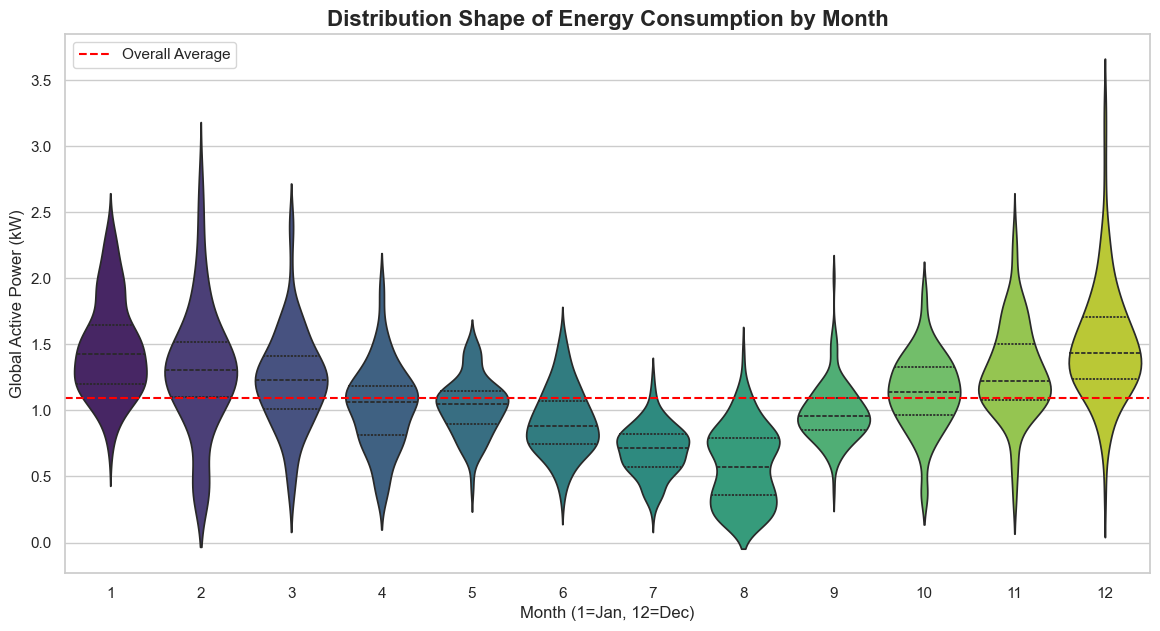

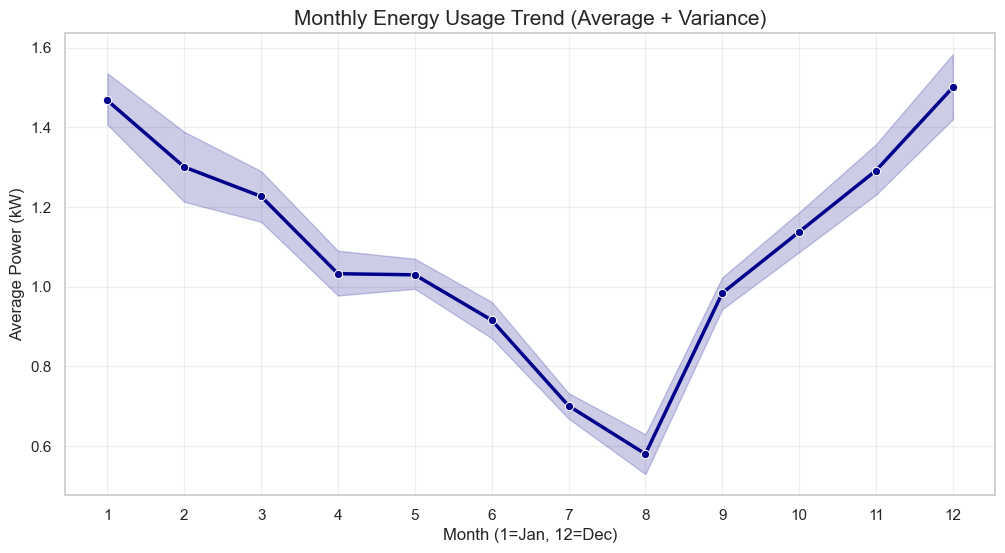

C:\Users\abhij\AppData\Local\Temp\ipykernel_28860\4093442628.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='Global_active_power', data=df, palette='coolwarm')


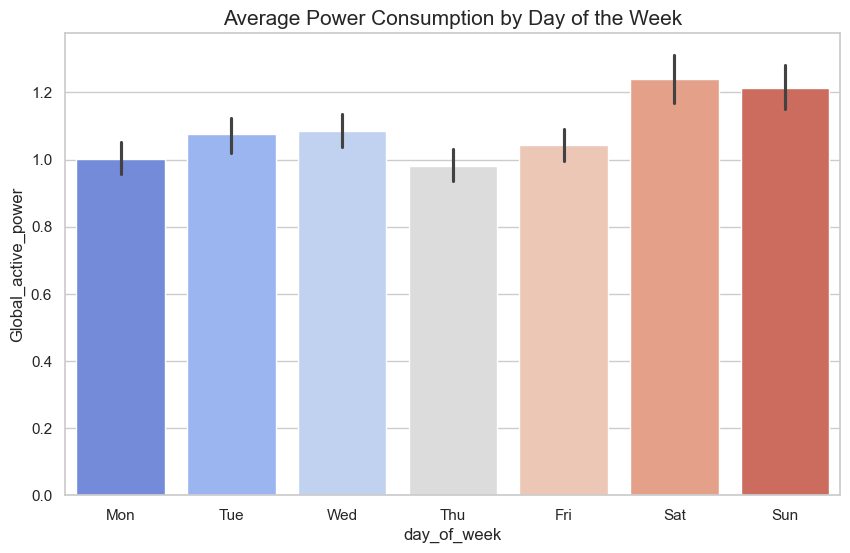

EDA Complete! Check your folder for: eda_time_trend.png, eda_seasonal_boxplot.png, and eda_weekly_pattern.png


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def run_eda(input_file):
    print(f"--- Step 1.5: Running EDA on {input_file} ---")
    
    # 1. Load the cleaned daily data
    df = pd.read_csv(input_file, index_col='dt', parse_dates=True)
    
    # Set a professional style
    sns.set_theme(style="whitegrid")

    # --- VISUALIZATION 1: Time Series Trend ---
    # This shows if the energy usage is increasing over the years.
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df['Global_active_power'], color='royalblue', linewidth=1)
    plt.title('Daily Global Active Power Consumption (2006-2010)', fontsize=15)
    plt.xlabel('Date')
    plt.ylabel('Power (kW)')
    plt.savefig('eda_time_trend.png')
    plt.show()
    
    # --- VISUALIZATION 2: Seasonal Patterns (Monthly Boxplot) ---
    # This proves why we need a "Temperature Proxy" or Month feature.
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='month', y='Global_active_power', data=df, palette='Spectral')
    plt.title('Energy Consumption Distribution by Month', fontsize=15)
    plt.xlabel('Month (1=Jan, 12=Dec)')
    plt.ylabel('Power (kW)')
    plt.savefig('eda_seasonal_boxplot.png')
    plt.show()

    # --- UPDATED VISUALIZATION 2: Monthly Distribution (Violin Plot) ---
    # This shows the "shape" of energy usage. Wider parts mean more days had that usage level.
    plt.figure(figsize=(14, 7))
    sns.violinplot(x='month', y='Global_active_power', data=df, inner="quartile", palette='viridis')
    
    plt.title('Distribution Shape of Energy Consumption by Month', fontsize=16, fontweight='bold')
    plt.xlabel('Month (1=Jan, 12=Dec)', fontsize=12)
    plt.ylabel('Global Active Power (kW)', fontsize=12)
    
    # Adding a horizontal line for the overall average to provide context
    plt.axhline(df['Global_active_power'].mean(), color='red', linestyle='--', label='Overall Average')
    plt.legend()
    
    plt.savefig('eda_seasonal_violin.png')
    plt.show()


    # --- SIMPLE VISUALIZATION 2: Monthly Energy Trend ---
    plt.figure(figsize=(12, 6))
    
    # This creates a line with a shaded area representing the 95% confidence interval
    sns.lineplot(x='month', y='Global_active_power', data=df, 
                 marker='o', color='darkblue', linewidth=2.5)
    
    plt.title('Monthly Energy Usage Trend (Average + Variance)', fontsize=15)
    plt.xlabel('Month (1=Jan, 12=Dec)')
    plt.ylabel('Average Power (kW)')
    plt.xticks(range(1, 13)) # Ensure every month is labeled 1 through 12
    plt.grid(True, alpha=0.3)
    
    plt.savefig('eda_monthly_trend_simple.png')
    plt.show()




    # --- VISUALIZATION 3: Weekly Routine (Day of Week) ---
    # This proves why we added 'lag_7' (the same day last week).
    plt.figure(figsize=(10, 6))
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    sns.barplot(x='day_of_week', y='Global_active_power', data=df, palette='coolwarm')
    plt.xticks(ticks=range(7), labels=day_names)
    plt.title('Average Power Consumption by Day of the Week', fontsize=15)
    plt.savefig('eda_weekly_pattern.png')
    plt.show()

    print("EDA Complete! Check your folder for: eda_time_trend.png, eda_seasonal_boxplot.png, and eda_weekly_pattern.png")

if __name__ == "__main__":
    run_eda('cleaned_daily_data.csv')